# Install Libraries & Dependencies

In [ ]:
!pip install scikit-image==0.19.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 44.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.7 MB/s eta 0:00:00
  Created wheel for scikit-image: filename=scikit_image-0.19.3-cp311-cp311-linux_x86_64.whl size=33913083 sha256=33c69e1465ee70fae7c5964413c4c131adde8c7a77e17d534b0e8c08d5534fcd
  Stored in directory: /root/.cache/pip/wheels/7b/12/cd/f311cabf9e8708d1e29e9951ee0839fb89b69e1acc60c94927
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.2
    Uninstalling scikit-image-0.25.2:
      Successfully uninstalled scikit-image-0.25.2


In [ ]:
!pip install scikit-image --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
%matplotlib inline
import os
import numpy as np
import cv2
import glob
import random
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import graycomatrix, graycoprops
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from tensorflow.keras import layers, models, Input
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Data Preprocessing

In [ ]:
# Extract BraTS18 Dataset
zip_file_path = '/content/BraTs18.zip'
extract_path = '/content/BraTs18'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content/BraTs18


In [ ]:
# Define Paths and Load Files
images_dir = "/content/BraTs18/brats18/images"
masks_dir = "/content/BraTs18/brats18/masks"

image_files = sorted(glob.glob(os.path.join(images_dir, "image_*.png")))
mask_files = sorted(glob.glob(os.path.join(masks_dir, "mask_*.png")))

print(f"Found {len(image_files)} image files: {image_files[:5]}")
print(f"Found {len(mask_files)} mask files: {mask_files[:5]}")

assert len(image_files) == len(mask_files), "Mismatch between images and masks!"

Found 5042 image files: ['/content/BraTs18/brats18/images/image_1.png', '/content/BraTs18/brats18/images/image_10.png', '/content/BraTs18/brats18/images/image_100.png', '/content/BraTs18/brats18/images/image_1000.png', '/content/BraTs18/brats18/images/image_1001.png']
Found 5042 mask files: ['/content/BraTs18/brats18/masks/mask_1.png', '/content/BraTs18/brats18/masks/mask_10.png', '/content/BraTs18/brats18/masks/mask_100.png', '/content/BraTs18/brats18/masks/mask_1000.png', '/content/BraTs18/brats18/masks/mask_1001.png']


In [ ]:
def load_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return image

def normalize_image(image):
    image = image.astype(np.float32)
    return image / 255.0

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply((image * 255).astype(np.uint8)) / 255.0

def resize_image(image, target_size=(112, 112)):
    return cv2.resize(image, target_size)

def preprocess_image(file_path, target_size=(112, 112)):
    image = load_image(file_path)
    normalized_image = normalize_image(image)
    enhanced_image = enhance_contrast(normalized_image)
    resized_image = resize_image(enhanced_image, target_size)
    return resized_image

def preprocess_mask(mask, target_size=(112, 112)):
    print("Unique values in mask before resize:", np.unique(mask))
    resized_mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)
    print("Unique values in mask after resize:", np.unique(resized_mask))
    return resized_mask.astype(np.int32)

In [ ]:
# Split and Preprocess Data
combined = list(zip(image_files, mask_files))
random.shuffle(combined)
split_idx = int(len(combined) * 0.8)
train_pairs = combined[:split_idx]
val_pairs = combined[split_idx:]

train_images = [preprocess_image(img_path) for img_path, _ in train_pairs]
train_masks = [preprocess_mask(load_image(mask_path)) for _, mask_path in train_pairs]
val_images = [preprocess_image(img_path) for img_path, _ in val_pairs]
val_masks = [preprocess_mask(load_image(mask_path)) for _, mask_path in val_pairs]




Streaming output truncated to the last 5000 lines.
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in mask before resize: [  0 255]
Unique values in mask after resize: [  0 255]
Unique values in ma

In [ ]:
train_images = np.array(train_images)
val_images = np.array(val_images)
train_masks = np.array(train_masks)
val_masks = np.array(val_masks)

if train_images.ndim == 3:
    train_images = train_images[..., np.newaxis]
elif train_images.shape[-1] == 1 and train_images.ndim == 5:
    train_images = train_images.squeeze(axis=-1)

if val_images.ndim == 3:
    val_images = val_images[..., np.newaxis]
elif val_images.shape[-1] == 1 and val_images.ndim == 5:
    val_images = val_images.squeeze(axis=-1)

if train_masks.ndim == 3:
    train_masks = train_masks[..., np.newaxis]
if val_masks.ndim == 3:
    val_masks = val_masks[..., np.newaxis]

print(f"Corrected train_images shape: {train_images.shape}")
print(f"Corrected val_images shape: {val_images.shape}")
print(f"Corrected train_masks shape: {train_masks.shape}")
print(f"Corrected val_masks shape: {val_masks.shape}")

Corrected train_images shape: (4033, 112, 112, 1)
Corrected val_images shape: (1009, 112, 112, 1)
Corrected train_masks shape: (4033, 112, 112, 1)
Corrected val_masks shape: (1009, 112, 112, 1)


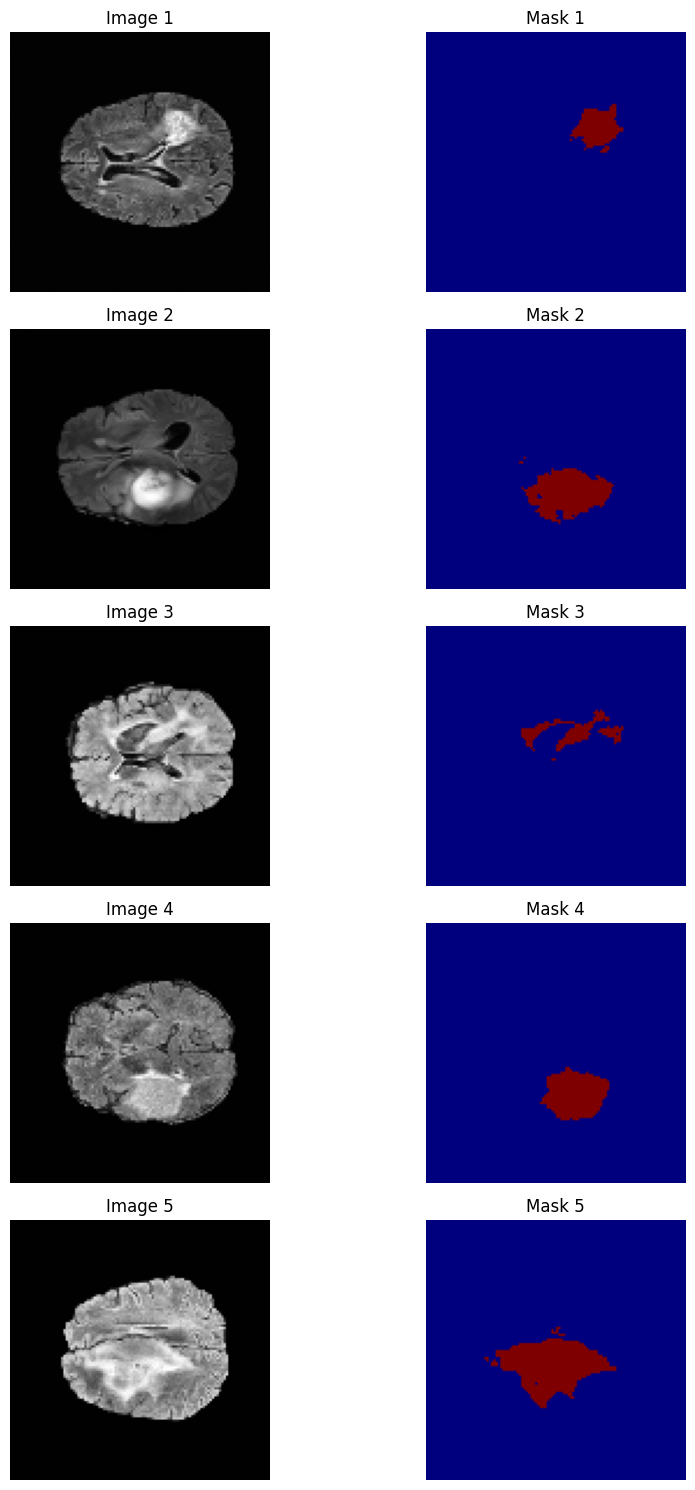

In [ ]:
def display_sample_images(images, masks_cat, n_samples=5):
    fig, axes = plt.subplots(n_samples, 2, figsize=(10, 15))
    for i in range(n_samples):
        axes[i, 0].imshow(images[i].squeeze(), cmap='gray')
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 0].axis('off')
        mask = np.argmax(masks_cat[i], axis=-1)
        axes[i, 1].imshow(mask, cmap='jet')
        axes[i, 1].set_title(f"Mask {i+1}")
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(train_images, train_masks_cat, n_samples=5)

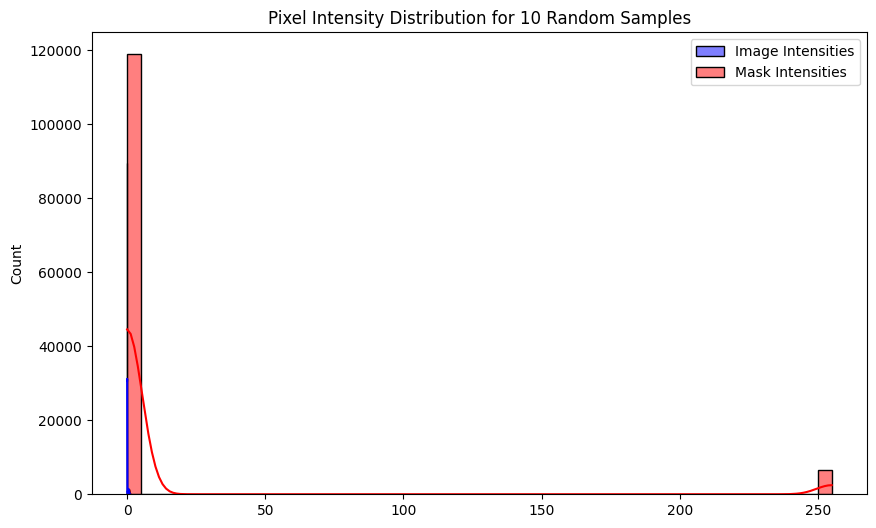

In [ ]:
def plot_pixel_intensity_histogram(images, masks, sample_size=10):
    sample_indices = random.sample(range(len(images)), sample_size)
    sample_images = [images[i].squeeze() for i in sample_indices]
    sample_masks = [masks[i] for i in sample_indices]
    image_intensity = np.concatenate([img.flatten() for img in sample_images])
    mask_intensity = np.concatenate([mask.flatten() for mask in sample_masks])
    plt.figure(figsize=(10, 6))
    sns.histplot(image_intensity, bins=50, color='blue', label='Image Intensities', kde=True)
    sns.histplot(mask_intensity, bins=50, color='red', label='Mask Intensities', kde=True)
    plt.legend()
    plt.title(f'Pixel Intensity Distribution for {sample_size} Random Samples')
    plt.show()

plot_pixel_intensity_histogram(train_images, train_masks, sample_size=10)

In [ ]:
#Data Augmentation
image_datagen = ImageDataGenerator(rotation_range=15,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.1)
mask_datagen = ImageDataGenerator(rotation_range=15,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  zoom_range=0.1)

In [ ]:
def check_data_balance(masks):
    combined_masks = np.concatenate([mask.flatten() for mask in masks])
    total_pixels = combined_masks.size
    tumor_pixels = np.sum(combined_masks > 0)
    tumor_percentage = (tumor_pixels / total_pixels) * 100
    print(f"Tumor pixels percentage: {tumor_percentage:.2f}%")

print("Training set balance:")
check_data_balance(train_masks)
print("\nValidation set balance:")
check_data_balance(val_masks)

Training set balance:
Tumor pixels percentage: 3.91%

Validation set balance:
Tumor pixels percentage: 3.86%


Unique values before: [  0 255]
Unique values in train_masks after replacement: [0 1]
Unique values in train_masks_cat after argmax: [0 1]


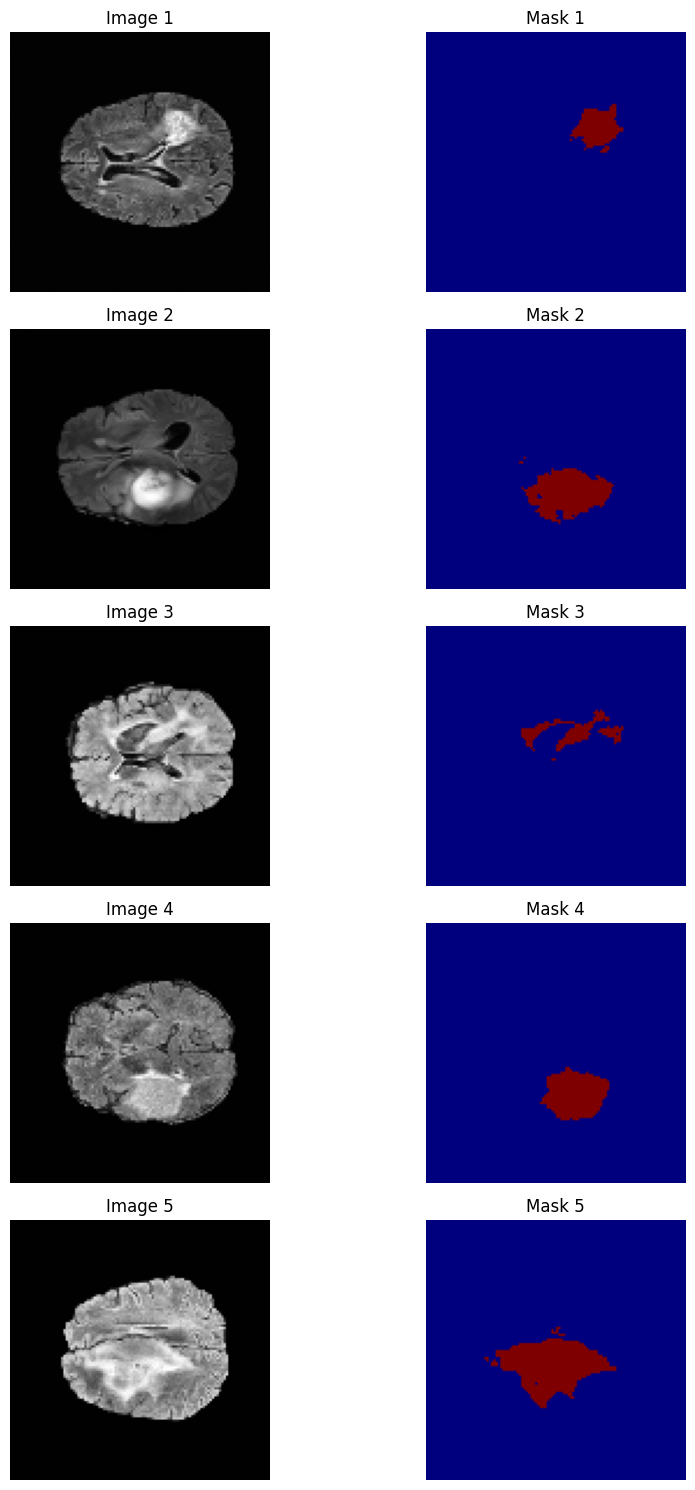

In [ ]:
train_masks = train_masks.astype("int32")
val_masks = val_masks.astype("int32")
print("Unique values before:", np.unique(train_masks))

train_masks[train_masks == 255] = 1
train_masks[train_masks == 4] = 3
val_masks[val_masks == 255] = 1
val_masks[val_masks == 4] = 3

train_masks_cat = to_categorical(train_masks, num_classes=4)
val_masks_cat = to_categorical(val_masks, num_classes=4)

print("Unique values in train_masks after replacement:", np.unique(train_masks))
print("Unique values in train_masks_cat after argmax:", np.unique(np.argmax(train_masks_cat, axis=-1)))

display_sample_images(train_images, train_masks_cat)

In [ ]:
def build_patch_mlp(input_shape=(112, 112, 1), num_classes=4, patch_size=7):
    inputs = Input(shape=input_shape)
    patches = layers.Reshape((input_shape[0]//patch_size, patch_size,
                             input_shape[1]//patch_size, patch_size, 1))(inputs)
    patches = layers.Permute((1, 3, 2, 4, 5))(patches)
    patches = layers.Reshape((-1, patch_size * patch_size))(patches)
    mlp = layers.TimeDistributed(layers.Dense(128, activation='relu'))(patches)
    mlp = layers.TimeDistributed(layers.Dense(64, activation='relu'))(mlp)
    mlp = layers.TimeDistributed(layers.Dense(num_classes, activation='softmax'))(mlp)
    h, w = input_shape[0] // patch_size, input_shape[1] // patch_size
    output = layers.Reshape((h, w, num_classes))(mlp)
    output = layers.UpSampling2D(size=(patch_size, patch_size), interpolation='nearest')(output)
    return models.Model(inputs, output)

from tensorflow.keras.losses import CategoricalCrossentropy
weights = tf.constant([0.05, 1.0, 1.0, 1.0], dtype=tf.float32)
cce = CategoricalCrossentropy()

def weighted_loss(y_true, y_pred):
    y_true_weighted = y_true * weights
    y_pred_weighted = y_pred * weights
    return cce(y_true_weighted, y_pred_weighted)

model = build_patch_mlp()
model.compile(optimizer='adam', loss=weighted_loss, metrics=['accuracy'])

def data_generator(images, masks, batch_size, image_datagen, mask_datagen):
    image_gen = image_datagen.flow(images, batch_size=batch_size, seed=42)
    mask_gen = mask_datagen.flow(masks, batch_size=batch_size, seed=42)
    while True:
        yield next(image_gen), next(mask_gen)

batch_size = 32
steps_per_epoch = max(1, len(train_images) // batch_size)
model.fit(data_generator(train_images, train_masks_cat, batch_size, image_datagen, mask_datagen),
          validation_data=(val_images, val_masks_cat),
          epochs=5,
          steps_per_epoch=steps_per_epoch)

y_pred = model.predict(val_images)
y_pred_labels = np.argmax(y_pred, axis=-1).flatten()
y_true_labels = np.argmax(val_masks_cat, axis=-1).flatten()

report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 157s 912ms/step - accuracy: 0.7725 - loss: 0.1564 - val_accuracy: 0.9671 - val_loss: 0.0236
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 98s 781ms/step - accuracy: 0.9690 - loss: 0.0228 - val_accuracy: 0.9681 - val_loss: 0.0200
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 95s 756ms/step - accuracy: 0.9674 - loss: 0.0212 - val_accuracy: 0.9651 - val_loss: 0.0200
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 96s 766ms/step - accuracy: 0.9698 - loss: 0.0201 - val_accuracy: 0.9718 - val_loss: 0.0185
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 104s 827ms/step - accuracy: 0.9692 - loss: 0.0201 - val_accuracy: 0.9733 - val_loss: 0.0183
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 596ms/step
              precision    recall  f1-score       support
0              0.978479  0.994048  0.986202  1.216864e+07
1              0.754179  0.455103  0.567658  4.882610e+05
accuracy       0.973257  0.973257  0.973257  9.732573e-01
macro avg      0.866329  0.724575  0.776930  1.265690e+07
weighted avg   0

Found tumor in validation image index 0


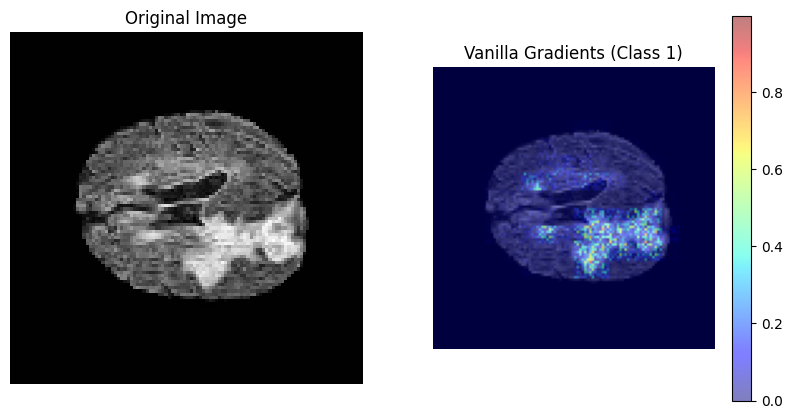

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sample_image = None
sample_mask = None
for idx in range(len(val_masks_cat)):
    unique_vals = np.unique(np.argmax(val_masks_cat[idx], axis=-1))
    if 1 in unique_vals:
        print(f"Found tumor in validation image index {idx}")
        sample_image = val_images[idx:idx+1]
        sample_mask = val_masks_cat[idx:idx+1]
        break

if sample_image is None:
    raise ValueError("No validation image found with tumor (class 1).")
sample_image_tensor = tf.convert_to_tensor(sample_image, dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(sample_image_tensor)
    predictions = model(sample_image_tensor)
    class_idx = 1
    loss = tf.reduce_mean(predictions[..., class_idx])

gradients = tape.gradient(loss, sample_image_tensor)
gradients = gradients.numpy()


gradients_normalized = np.abs(gradients)
gradients_normalized = (gradients_normalized - gradients_normalized.min()) / (gradients_normalized.max() - gradients_normalized.min() + 1e-8)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Vanilla Gradients (Class 1)")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.imshow(gradients_normalized[0, :, :, 0], cmap='jet', alpha=0.5)
plt.colorbar()
plt.axis('off')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 112, 112, 1))
  warnings.warn(msg)


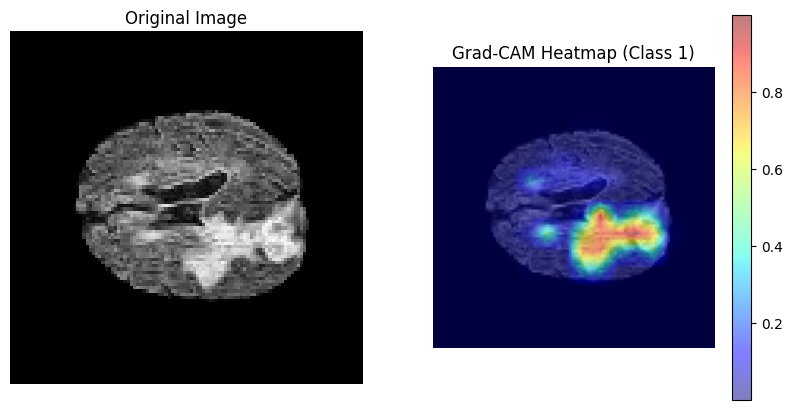

In [ ]:
layer_name = 'reshape_2'

def grad_cam(model, image, layer_name, class_idx=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        if class_idx is None:
            loss = tf.reduce_mean(predictions)
        else:
            loss = tf.reduce_mean(predictions[..., class_idx])

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)

    heatmap = tf.image.resize(heatmap[tf.newaxis, ..., tf.newaxis], (image.shape[1], image.shape[2]))[0, ..., 0]
    return heatmap.numpy()


class_idx = 1
heatmap = grad_cam(model, sample_image, layer_name, class_idx)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f"Grad-CAM Heatmap (Class {class_idx})")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.colorbar()
plt.axis('off')
plt.show()

Found tumor in validation image index 0


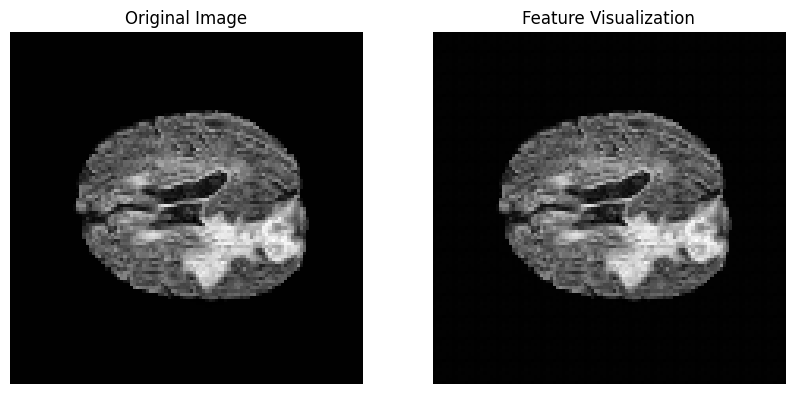

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


sample_image = None
for idx in range(len(val_images)):
    unique_vals = np.unique(np.argmax(val_masks_cat[idx], axis=-1))
    if 1 in unique_vals:
        print(f"Found tumor in validation image index {idx}")
        sample_image = val_images[idx:idx+1]
        break

if sample_image is None:
    raise ValueError("No validation image found with tumor (class 1).")


layer_name = 'time_distributed_1'
layer_output = model.get_layer(layer_name).output


feature_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)


input_image = tf.convert_to_tensor(sample_image, dtype=tf.float32)
input_image = tf.Variable(input_image, trainable=True)

def total_variation_loss(image):
    x_diff = image[:, 1:, :, :] - image[:, :-1, :, :]
    y_diff = image[:, :, 1:, :] - image[:, :, :-1, :]
    return tf.reduce_mean(tf.square(x_diff)) + tf.reduce_mean(tf.square(y_diff))


steps = 200
step_size = 0.05
for step in range(steps):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        layer_activation = feature_model(input_image)

        loss = tf.reduce_mean(layer_activation) - 1e-4 * total_variation_loss(input_image)

    gradients = tape.gradient(loss, input_image)
    gradients = tf.clip_by_value(gradients, -1, 1)
    input_image.assign_add(step_size * gradients)

visualized_image = input_image.numpy()
visualized_image = np.mean(visualized_image, axis=-1)
visualized_image = (visualized_image - visualized_image.min()) / (visualized_image.max() - visualized_image.min() + 1e-8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Feature Visualization")
plt.imshow(visualized_image[0], cmap='gray')
plt.axis('off')
plt.show()

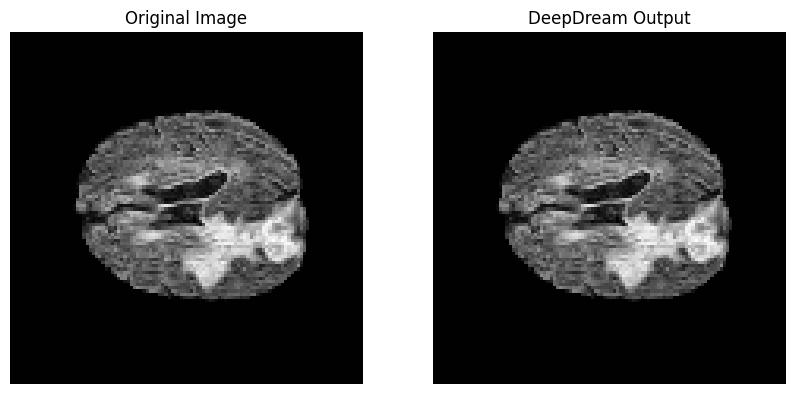

In [ ]:
layer_name = 'time_distributed_1'
layer_output = model.get_layer(layer_name).output
deepdream_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)

def deepdream_step(image, steps=100, step_size=0.01):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.Variable(image, trainable=True)

    for step in range(steps):
        with tf.GradientTape() as tape:
            tape.watch(image)
            activation = deepdream_model(image)
            loss = tf.reduce_mean(activation)

        gradients = tape.gradient(loss, image)
        gradients = tf.clip_by_value(gradients, -1, 1)
        image.assign_add(step_size * gradients)

    return image.numpy()

dream_image = sample_image.copy()
dream_image = deepdream_step(dream_image, steps=100, step_size=0.01)

dream_image_normalized = (dream_image - dream_image.min()) / (dream_image.max() - dream_image.min() + 1e-8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("DeepDream Output")
plt.imshow(dream_image_normalized[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()